# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

## Make Classification: Car Brand Logos

### EMILIANO MENDOZA NIETO - A01706083

In [37]:
# Librerias usadas
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [38]:
# Rutas de los directorios de entrenamiento y validación
train_path = 'Car_Brand_Logos\\Train'
validation_path = 'Car_Brand_Logos\\Test'


In [39]:
# Dimensiones de la imagen y número de clases
img_width, img_height = 224, 224  # Dimensiones esperadas por VGG16
num_classes = 8  # Cambiar según el número de marcas de coches en el dataset
"""             1.- Hyundai
                2.- Lexus
                3.- Mazda
                4.- Mercedes
                5.- Opel
                6.- Skoda
                7.- Toyota
                8.- Volkswagen"""


'             1.- Hyundai\n                2.- Lexus\n                3.- Mazda\n                4.- Mercedes\n                5.- Opel\n                6.- Skoda\n                7.- Toyota\n                8.- Volkswagen'

In [40]:
# Generador de datos con aumento de datos para el entrenamiento
train_data_aum = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [41]:
# Solo necesitamos rescale para la validación, sin aumento de datos
validation_datagen = ImageDataGenerator(rescale=1./255)


In [42]:
# Flujos de datos de entrenamiento y validación, usando las rutas de directorios y el generador de datos
train_generator = train_data_aum.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [43]:
# Cargamos la base de VGG16 sin incluir las capas superiores y con pesos preentrenados en ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [44]:
# Congelamos las capas de la base_model
for layer in base_model.layers:
    layer.trainable = False

In [45]:
# Añadimos nuestras capas personalizadas en la parte superior de la base_model
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)


In [46]:
# Definimos el modelo final
model = Model(inputs=base_model.input, outputs=predictions)


In [47]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [48]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [49]:
# Entrenamos el modelo
entrenamiento = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
78/78 [==============================] - 168s 2s/step - loss: 1.7940 - accuracy: 0.3668 - val_loss: 1.1479 - val_accuracy: 0.7031
Epoch 2/10
78/78 [==============================] - 170s 2s/step - loss: 1.2484 - accuracy: 0.5985 - val_loss: 0.9601 - val_accuracy: 0.7396
Epoch 3/10
78/78 [==============================] - 171s 2s/step - loss: 1.0596 - accuracy: 0.6518 - val_loss: 0.8495 - val_accuracy: 0.7448
Epoch 4/10
78/78 [==============================] - 174s 2s/step - loss: 0.9531 - accuracy: 0.6985 - val_loss: 0.8001 - val_accuracy: 0.7552
Epoch 5/10
78/78 [==============================] - 171s 2s/step - loss: 0.8803 - accuracy: 0.7098 - val_loss: 0.7747 - val_accuracy: 0.7526
Epoch 6/10
78/78 [==============================] - 171s 2s/step - loss: 0.7954 - accuracy: 0.7485 - val_loss: 0.7660 - val_accuracy: 0.7734
Epoch 7/10
78/78 [==============================] - 172s 2s/step - loss: 0.7657 - accuracy: 0.7497 - val_loss: 0.7218 - val_accuracy: 0.7760
Epoch 8/10
78

In [50]:
# Guardamos el modelo
model.save('car_brand_classifier3.h5')

C:\Users\emime\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# Plot de la precisión y la pérdida en entrenamiento y validación
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(accuracy) + 1)

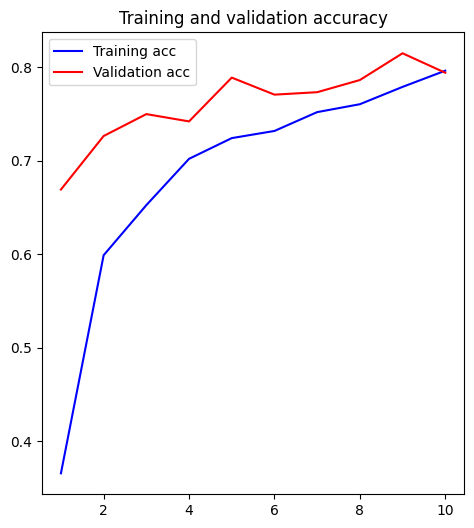

In [23]:
# Precisión en entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

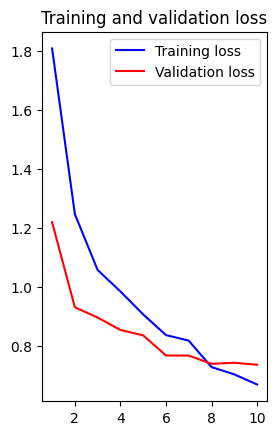

In [29]:
# Pérdida en entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# Carga del modelo
model = load_model('car_brand_classifier2.h5')

### * El modelo parece comportarse bien, con la precisión de validación siguiendo de cerca a la precisión de entrenamiento y la pérdida de validación también disminuyendo de manera similar a la de entrenamiento.

### * No obstante, parece que la precisión de validación comienza a estabilizarse mientras que la precisión de entrenamiento sigue mejorando, lo cual puede ser una indicación temprana de sobreajuste

### * POSIBLES MEJORAS: Capas adicionales de Dropout o utilizar regularización L1/L2 en las capas densas para reducir el sobreajuste.


In [55]:
# Descongelamos las últimas bloques convolucionales de VGG16
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [56]:
# Re-compilamos el modelo para que los cambios tengan efecto
model.compile(optimizer=Adam(learning_rate=0.00001),  # Learning rate más bajo para el ajuste fino
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
# Continuamos el entrenamiento
entrenamiento_fino = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Número de epochs para el ajuste fino
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
78/78 [==============================] - 210s 3s/step - loss: 0.5252 - accuracy: 0.8251 - val_loss: 0.6518 - val_accuracy: 0.8125
Epoch 2/5
78/78 [==============================] - 216s 3s/step - loss: 0.4318 - accuracy: 0.8569 - val_loss: 0.6317 - val_accuracy: 0.8385
Epoch 3/5
78/78 [==============================] - 220s 3s/step - loss: 0.3847 - accuracy: 0.8815 - val_loss: 0.5677 - val_accuracy: 0.8411
Epoch 4/5
78/78 [==============================] - 214s 3s/step - loss: 0.3541 - accuracy: 0.8888 - val_loss: 0.5988 - val_accuracy: 0.8516
Epoch 5/5
78/78 [==============================] - 219s 3s/step - loss: 0.3131 - accuracy: 0.9021 - val_loss: 0.6256 - val_accuracy: 0.8464


In [59]:
# Guardamos el modelo
model.save('car_brand_classifier4.h5')

C:\Users\emime\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
# Plot de la precisión y la pérdida en entrenamiento y validación
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(accuracy) + 1)

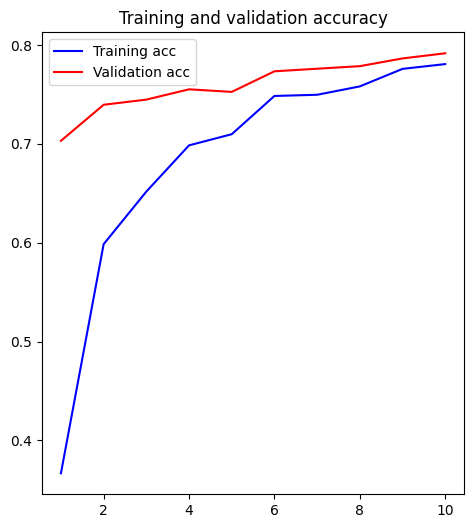

In [61]:
# Precisión en entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

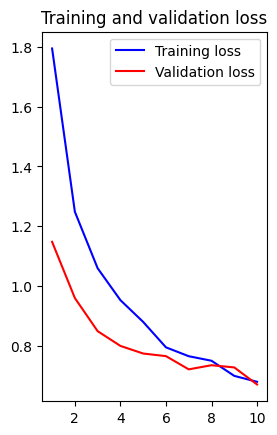

In [62]:
# Pérdida en entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [64]:
def predict_car_brand(image_path, model):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)
    
    labels = {v: k for k, v in train_generator.class_indices.items()}
    car_brand = labels[class_idx[0]]
    return car_brand

# Ejemplo de uso:
image_path = 'Car_Brand_Logos\\new_images\\Lexus.jpeg'
print(predict_car_brand(image_path, model))


1/1 [==============================] - 0s 164ms/step
lexus
